In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
chain = np.load('../runs/chain_toymodel_3_factor.npy')

1.8363907793458984 0.8779570423382624


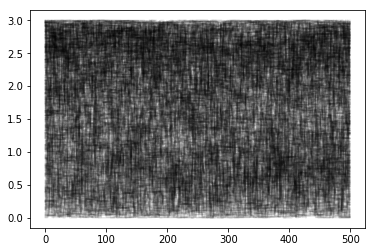

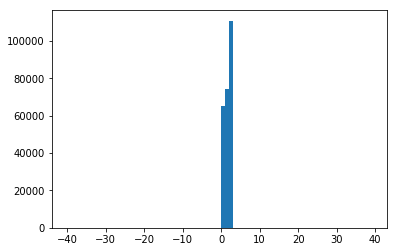

In [43]:
i = -5
clip = 2500
plt.plot(chain[0:,clip:,i].T, 'k', alpha=0.1)
print(np.median(chain[:,clip:,i]), np.std(chain[:,clip:,i]))
plt.show()

plt.hist(chain[:,clip:,i].flatten(), np.arange(-40, 40, 1))
plt.show()

In [21]:
sc = np.shape(chain)

In [22]:
clip = 2000
igburn = chain[:,clip:,:].flatten().reshape(sc[0]*(sc[1]-clip),sc[2])

si = np.shape(igburn)
rand = np.random.randint(0, si[0], 100)

In [23]:
rand

array([430217, 426010, 433141,    529, 484286, 137872, 143610, 439097,
       423918, 281518, 192684, 178522, 348202, 217268, 482181, 112890,
       419495, 340919, 291586, 340457, 350829, 452283, 228235, 178652,
       234460, 381219, 119655,  37026, 461597, 422012, 228544, 457258,
       269001, 221313, 309785, 436518, 337612,  11902, 416327, 478769,
       324308, 140129, 464359, 481416, 125071, 284773, 290834, 461826,
        77541, 202876, 339986, 413795, 197110, 139885, 291131, 423591,
       478191, 193187, 280994, 233676, 446307, 149273, 128712, 398213,
       337224,  92321, 156052, 213540, 379212, 194246,  74703, 318934,
       473234, 449217, 279142, 380431, 153228,  91937, 395858,   1827,
       450581, 457913, 464830,  24111, 283154,  16635,  22400, 466438,
       315412,  65122,  56196, 180172, 399815,  25499, 226158, 444515,
         6543, 179302,  70921,  26242])

In [24]:
import starry


time, vels, verr = np.loadtxt('../data/transit.vels', usecols=[0,1,2], unpack=True)

#time = time[:-4]
#vels = vels[:-4]
#verr = verr[:-4]

#time -= 18706.5

time -= 2458706.5

map = starry.Map(ydeg=4, udeg=2, rv=True, lazy=False)
map.reset()

Prot = 2.85             # days
P = 8.1387              # days
e = 0.0
w = 0.0
inc = 90.0

tuse = time + 0.0
euse = verr + 0.0
vuse = vels + 0.0

def rmcurve(tarr, params):

    vsini, r, b, a, u1, u2, obl, gamma, gammadot, gammadotdot, gamma3, gamma4, jitter_good, jitter_bad, q, factor, t0 = params
    veq = vsini / np.sin(inc * np.pi / 180.0)

    map.inc = inc
    map.obl = obl
    # map.add_spot(spot_amp, sigma=spot_sig, lon=spot_lon, lat=-spot_lat)
    map[1:] = [u1, u2]
    map.veq = veq

    f = (tarr - t0) / P * 2 * np.pi
    I = np.arccos(b / a)

    zo = a * np.cos(f)
    yo = -a * np.sin(np.pi / 2 + f) * np.cos(I)
    xo = a * np.sin(f) * np.sin(I)
    
    #gamma3 = 0.0
    gamma4 = 0.0

    theta = 360.0 / Prot * tarr

    rv_0 = map.rv(xo=xo, yo=yo, zo=zo, ro=r, theta=theta)
    trend = gamma + gammadot * (tarr - 0.15) + gammadotdot * (tarr - 0.15) ** 2 + gamma3*(tarr-0.15)**3 + gamma4*(tarr-0.15)**4
    rv = rv_0 + trend
    
    return rv, trend

In [25]:
tarr = np.arange(0, 0.5, 0.001)
rv_out = np.zeros((100, len(tarr)))
trend_out = np.zeros((100, len(tarr)))

for i in range(100):
    rv_out[i], trend_out[i] = rmcurve(tarr, igburn[rand[i]])

Compiling `rv`... Done.


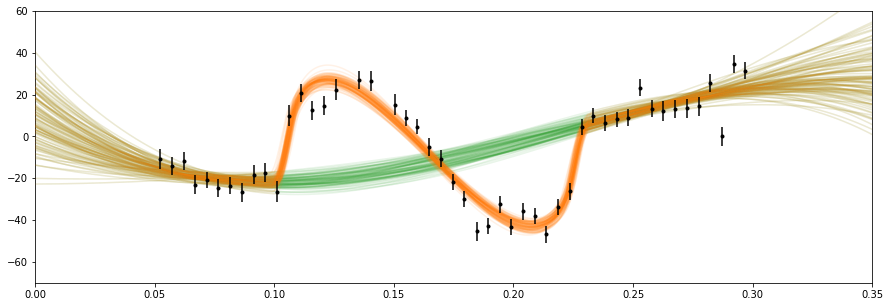

In [26]:
plt.figure(figsize=(15,5))

plt.plot(tarr, rv_out.T, 'C1', alpha=0.1, zorder=3)
plt.plot(tarr, trend_out.T, 'C2', alpha=0.1)

plt.errorbar(time, vels, yerr=verr, fmt='k.', zorder=5)

plt.ylim(-70, 60)
plt.xlim(0.0, 0.35)

plt.show()
